**GROUP 07 PROJECT**


In [28]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns

# Loading and reading datasets
df_1 = pd.read_csv('train.csv')
df_2 = pd.read_csv('test.csv')
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
#Checks whether the column SalePrice is missing in the test dataset (df_2).
# SalePrice is the value the model is expected to predict.
df = pd.concat([df_1, df_2], axis =0)
df = df.set_index('Id')

df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [29]:
#Finding null values
df.isna().sum() 

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [30]:
#Get columns which contain atleast 1 none value
df.isnull().sum ()[df.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

<Axes: ylabel='Id'>

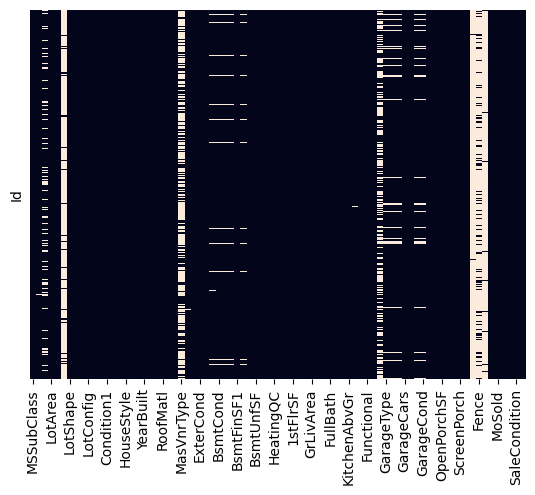

In [31]:
#plotting null values

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)


In [32]:
#Create another data frame that contain only distinct values that are not numbers
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)


In [33]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis =1)
df_objects = df_objects.fillna('null')
df_objects_encoded = pd.get_dummies(df_objects)

df_objects.head() #to show those columns with non_values less than 1100

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [34]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [35]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis=1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [36]:
#Creating new dataframe
new_df = pd.concat((df, df_objects_encoded), axis = 1)

In [37]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [38]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis =1)
new_df.isna().sum()[new_df.isna().sum()> 0]


LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [39]:
Mode_columns = ['GarageCars','GarageYrBlt','BsmtFullBath', 'BsmtHalfBath']

#Mode_columns: A list of column names where missing values will be replaced using the mode (the most frequent value in each column). 
#These columns likely represent categorical or discrete data.
Mean_columns = ['LotFrontage', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']
#Mean_columns: A list of column names where missing values will be replaced using the mean (average value of the column). 
#These columns likely represent numerical or continuous data.

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [40]:
#Training the dataset

training_data = new_df[0:len(df_1)]
#This selects the rows of new_df corresponding to the size of df_1 (the original training dataset).
#It assumes that the first len(df_1) rows in new_df are from the training data.
#The training dataset (training_data) is used to train the machine learning model.

testing_data = new_df[len(df_1):]

#This selects the rows of new_df after the first len(df_1) rows.
#These rows are assumed to belong to the test dataset.
#new_df is split into two subsets: one for training and one for testing.
testing_data = testing_data.drop(columns = 'SalePrice')

#Removes the SalePrice column from testing_data.
#The SalePrice column typically contains the target variable (the value we are predicting).
#This ensures that the testing data does not include the target variable during the prediction phase, preventing data leakage.

In [41]:
#sns.set_style(style='darkgrid')
#sns.pairplot(new_df)

<Axes: ylabel='Id'>

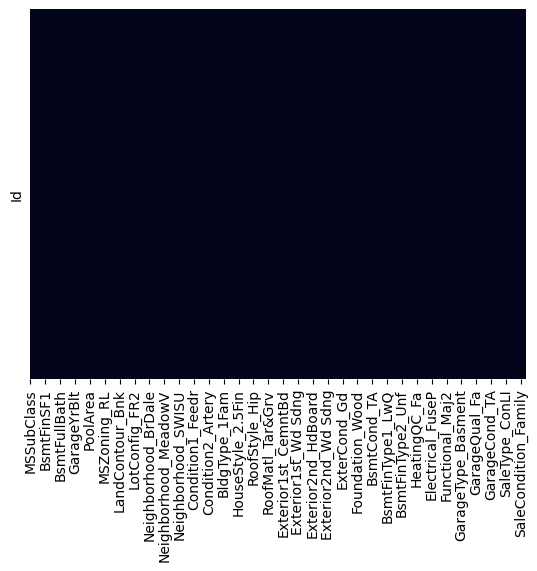

In [42]:
sns.heatmap(new_df.isnull(), yticklabels=False, cbar=False)
#This function generates a heatmap where True (missing values) and False (non-missing values) are represented visually.
#True and False are treated as 1 and 0 for the heatmap.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Prepare features (X) and target (Y)
X = training_data.drop(columns='SalePrice')  # Drop the target column
Y = training_data['SalePrice']  # Select the target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
model_1 = LinearRegression()

# Train the model with the training data
model_1.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model_1.predict(X_test)

# Evaluate model performance using Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 884420333.3165902


The MSE is very high meaning poor fitting of the model

In [45]:
# Apply log transformation to normalize target variable
Y_train_log = np.log(Y_train)
Y_test_log = np.log(Y_test)

# Train model with transformed target variable
model_1 = LinearRegression()
model_1.fit(X_train, Y_train_log)
y_pred_log = model_1.predict(X_test)

# Convert back to original scale for evaluation
y_pred = np.exp(y_pred_log)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error after log transformation: {mse}")

Mean Squared Error after log transformation: 530726240.18648875


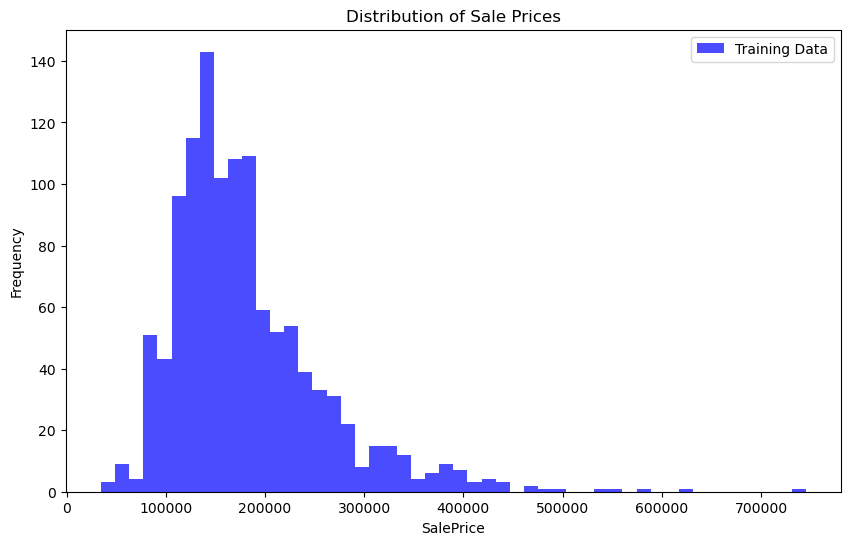

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(Y_train, bins=50, color='blue', alpha=0.7, label="Training Data")
plt.title('Distribution of Sale Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

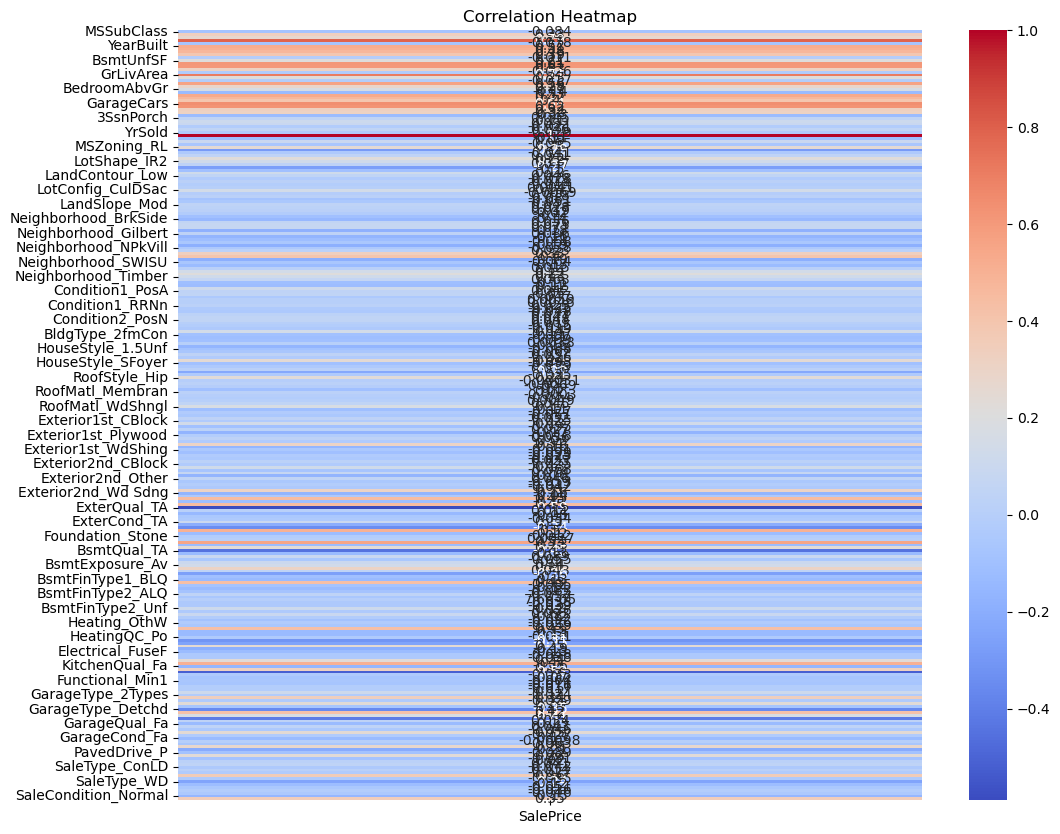

In [47]:
correlations = training_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations[['SalePrice']], annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [48]:

model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_2.fit(X,Y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

7324.8643538070055

In [49]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(X,Y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

118457936.45815413

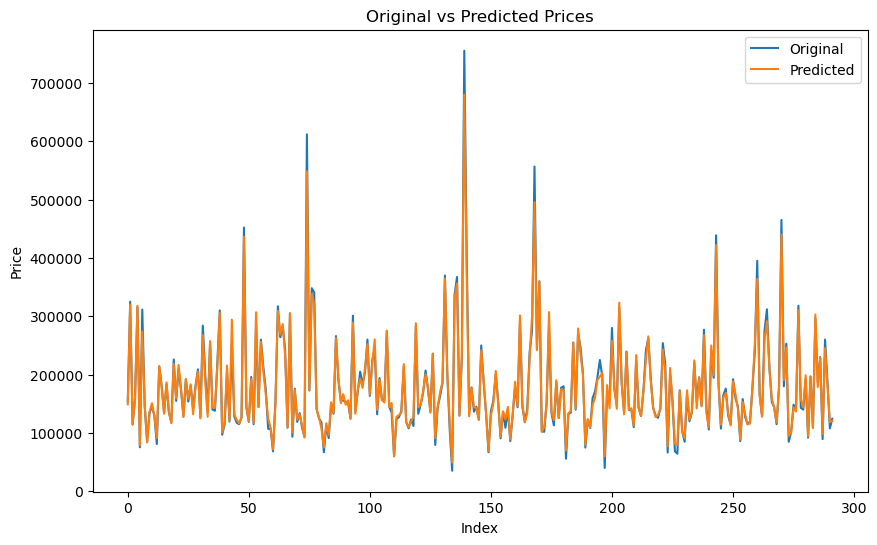

In [50]:
sort_indices = np.argsort('Y_test')

#plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()